Di datasetnya tuh ada tulisan: "The company sells electronic products"

Average profit margin electronic product store itu 3.5% kalau berdasarkan investopedia https://www.investopedia.com/ask/answers/051215/what-profit-margin-average-company-electronics-sector.asp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
# from sklearn.metrics import ConfusionMatrixDisplay

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Train.csv')

profit_margin = 0.035
df['profit_minus_discount'] = df['Cost_of_the_Product'] * profit_margin - df['Cost_of_the_Product'] * df['Discount_offered'] / 100
df['on_time'] = df['Reached.on.Time_Y.N'].apply(lambda x: 'yes' if x == 0 else 'no')

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,profit_minus_discount,on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,-71.685,no
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,-119.880,no
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,-81.435,no
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,-11.440,no
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,-78.200,no


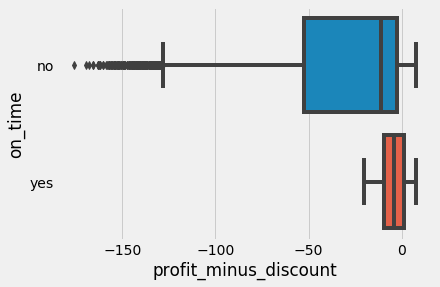

In [3]:
sns.boxplot(data = df, x = 'profit_minus_discount', y = 'on_time')

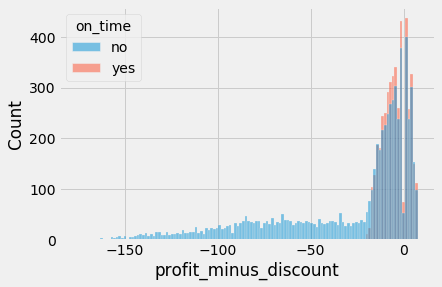

In [4]:
sns.histplot(data = df, x = df['profit_minus_discount'], hue = 'on_time')

C:\Users\Asif\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Asif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Asif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


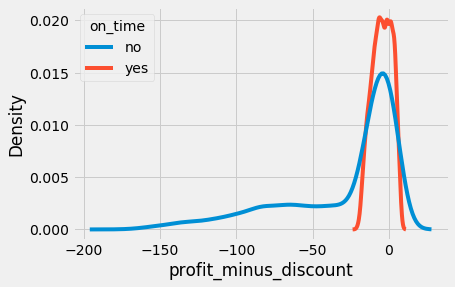

In [5]:
sns.kdeplot(data = df, x = 'profit_minus_discount', hue = 'on_time')